<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [2]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.0 Variable Identification

In [3]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
diamonds.describe(include=['category'])  #describe categorical variables

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


<Axes: xlabel='price', ylabel='Count'>

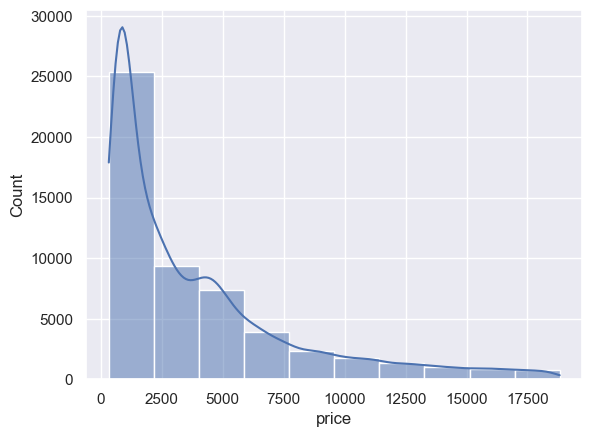

In [10]:
#visualize distributions using histograms

sns.histplot(data=diamonds,x='price',bins=10,kde=True)

In [ ]:
# findings the histogram shows that the price of most diamonds is below 5000. There are some outliers with prices above 15000. The distribution is right-skewed, indicating that there are more diamonds with lower prices compared to higher prices. The presence of a few high-priced diamonds suggests that there are some premium or rare diamonds in the dataset.

<Axes: ylabel='price'>

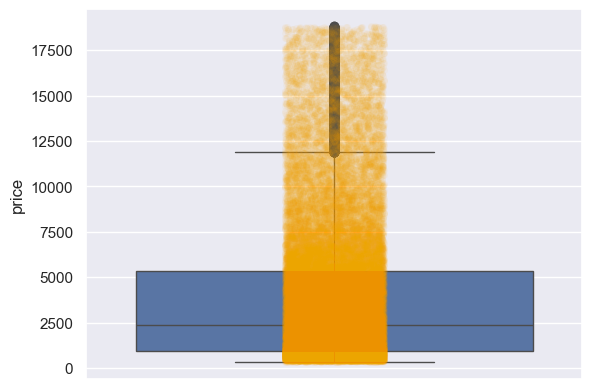

In [39]:
sns.boxplot(diamonds['price'])
sns.stripplot(diamonds['price'], color='orange', alpha=0.05, )

In [ ]:
#findings: the boxplot shows that the median price of diamonds is around 2400.  There are several outliers above the upper whisker, indicating that there are some diamonds with significantly higher prices compared to the rest of the dataset.

### 2.2 For categorical variables: frequency table, count plot

In [14]:
# Frequency table for 'cut'
print(diamonds['cut'].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


<Axes: xlabel='cut', ylabel='count'>

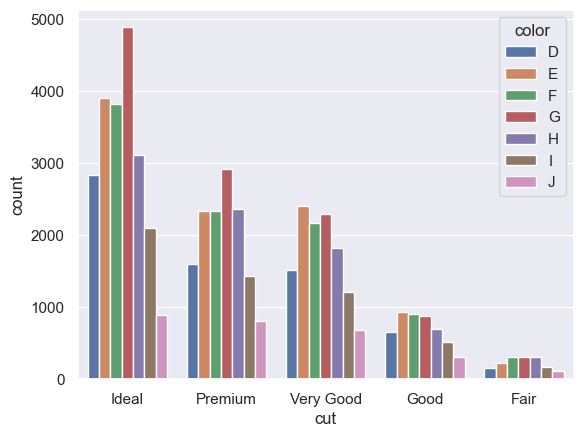

In [15]:
sns.countplot(data=diamonds,x=diamonds['cut'],hue=diamonds['color'])

In [ ]:
#findings:  the count plot shows that the most common cut quality is 'Ideal', followed by 'Premium' and 'Very Good'. The least common cut quality is 'Fair'. The distribution of cut quality appears to be fairly balanced, with a significant number of diamonds in each category. This suggests that the dataset contains a diverse range of diamond cuts, which could be useful for analysis related to diamond quality and pricing.

In [15]:
# Frequency table for 'color'
print(diamonds['color'].value_counts())

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64


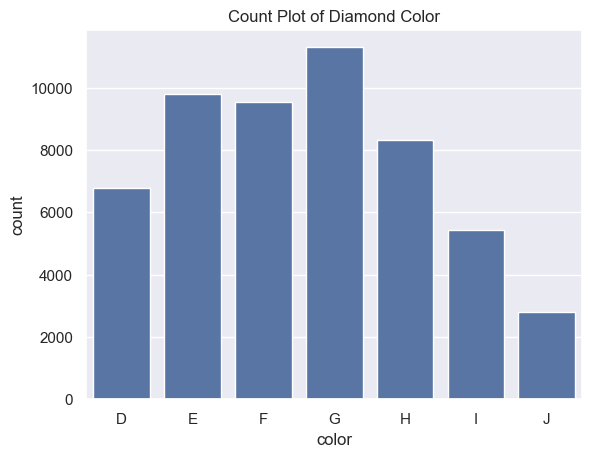

In [17]:
sns.countplot(data=diamonds, x='color')
plt.title('Count Plot of Diamond Color')
plt.show()

## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

<Axes: xlabel='depth', ylabel='price'>

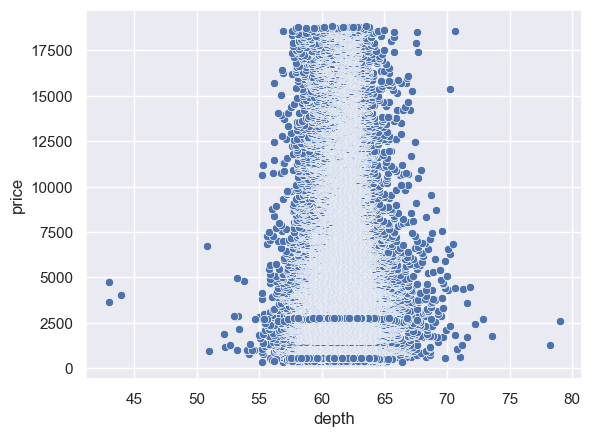

In [18]:
sns.scatterplot(data=diamonds,x=diamonds['depth'],y=diamonds['price'])

<Axes: xlabel='x', ylabel='price'>

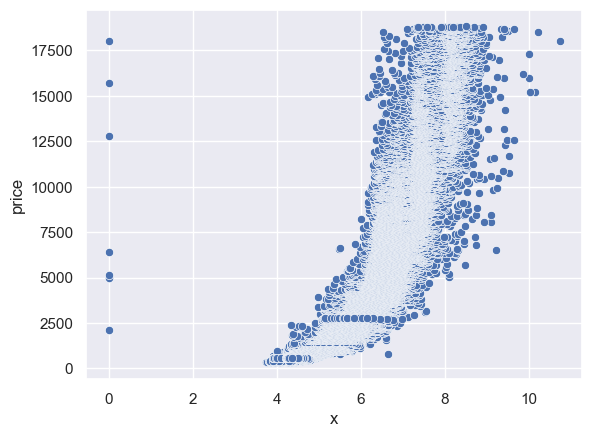

In [19]:
sns.scatterplot(data=diamonds,x=diamonds['x'],y=diamonds['price'])

### 3.2 Categorical & Categorical: stacked column chart

<Axes: xlabel='clarity', ylabel='count'>

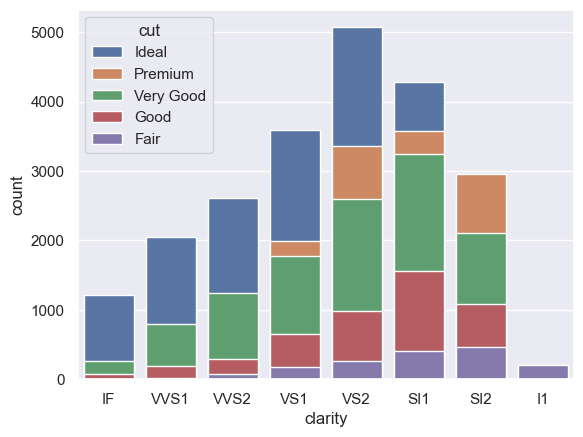

In [ ]:
# Stacked bar chart for 'clarity' vs 'cut'
sns.countplot(data=diamonds,x=diamonds['clarity'],hue=diamonds['cut'],dodge=False)

### 3.3 Categorical & Continuous: boxplots

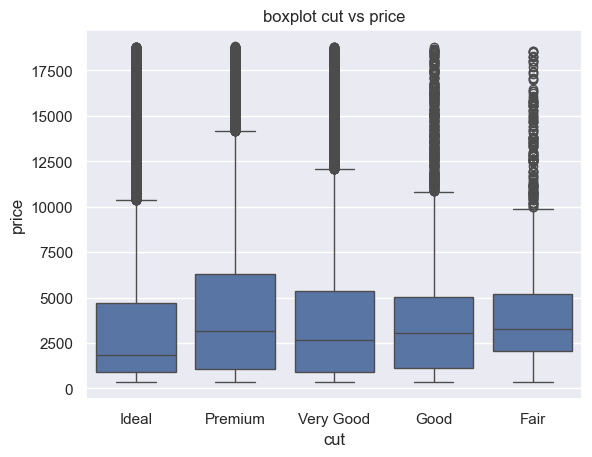

In [29]:
# Boxplot of price across cut categories
sns.boxplot(x=diamonds['cut'],y=diamonds['price'])
plt.title('boxplot cut vs price')
plt.show()



<Axes: xlabel='cut', ylabel='carat'>

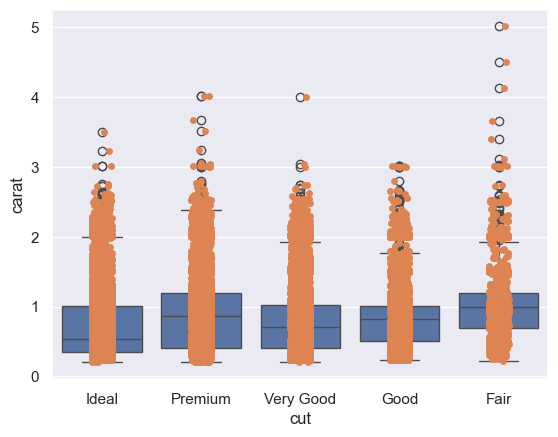

In [43]:
sns.boxplot(data=diamonds,x=diamonds['cut'],y=diamonds['carat'])
sns.stripplot(x=diamonds['cut'],y=diamonds['carat'])

### 3.4 Correlation Analysis: correlation matrix

In [45]:
corr_martrix=diamonds.corr(numeric_only=True)
corr_martrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

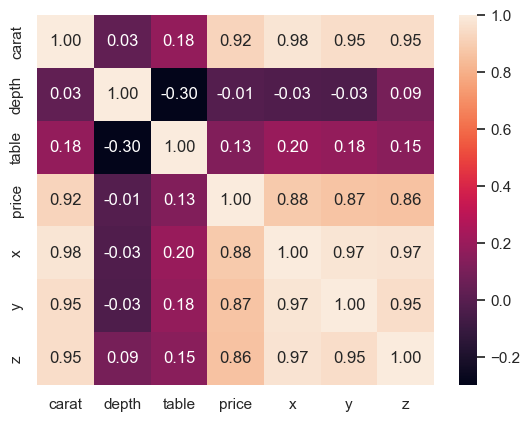

In [49]:
sns.heatmap(corr_martrix,annot=True,fmt="0.2f")

## 4.0 Missing Value Analysis

In [50]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [52]:
#findings : The missing value analysis for the diamonds dataset shows that there are no missing values in any of the columns. All variables (carat, cut, color, clarity, depth, table, price, x, y, z) have zero missing entries. This means the dataset is complete and does not require any imputation or handling for missing data.

## 5.0 Outlier Analysis

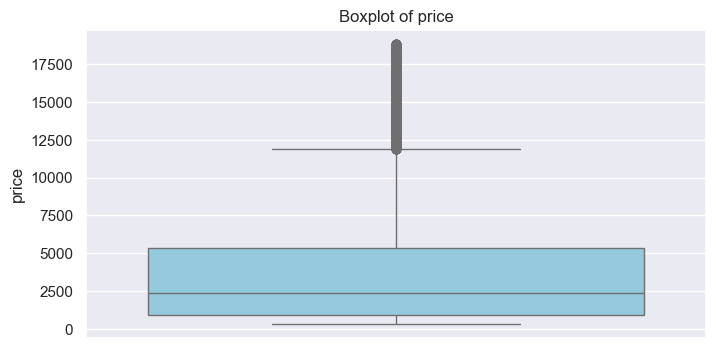

Number of outliers in 'price': 3540
Lower bound: -5611.375
Upper bound: 11885.625


In [54]:
# Outlier analysis for the 'price' feature only
feature = 'price'

# Boxplot visualization
plt.figure(figsize=(8, 4))
sns.boxplot(data=diamonds, y=feature, color='skyblue')
plt.title(f'Boxplot of {feature}')
plt.show()

# Statistical summary for outlier detection (IQR method)
Q1 = diamonds[feature].quantile(0.25)
Q3 = diamonds[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = diamonds[(diamonds[feature] < lower_bound) | (diamonds[feature] > upper_bound)][feature]

print(f"Number of outliers in '{feature}':", outliers.count())
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [55]:
diamonds["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [ ]:
# Frequency tables for quality attributes
print('Cut distribution:')
print(diamonds['cut'].value_counts())
print('\nColor distribution:')
print(diamonds['color'].value_counts())
print('\nClarity distribution:')
print(diamonds['clarity'].value_counts())

# Count plots for quality attributes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=diamonds, x='cut', ax=axes[0], palette='Set2')
axes[0].set_title('Cut Distribution')
sns.countplot(data=diamonds, x='color', ax=axes[1], palette='Set3')
axes[1].set_title('Color Distribution')
sns.countplot(data=diamonds, x='clarity', ax=axes[2], palette='Set1')
axes[2].set_title('Clarity Distribution')
plt.tight_layout()
plt.show()

### Distribution of Categorical Quality Attributes
The following analysis examines the distribution of the categorical variables related to diamond quality: `cut`, `color`, and `clarity`. Frequency tables and count plots are used to visualize and summarize these attributes.

### Suggested Data Preprocessing and Feature Engineering Steps
Based on the exploratory analysis, consider the following steps:
- **Outlier Handling:** Remove or cap outliers in continuous variables such as `price`, `carat`, `x`, `y`, and `z` to improve model performance.
- **Feature Scaling:** Apply normalization or standardization to continuous features for algorithms sensitive to scale.
- **Encoding Categorical Variables:** Use one-hot encoding or ordinal encoding for `cut`, `color`, and `clarity` depending on the modeling approach.
- **Feature Creation:**
    - Create interaction features (e.g., carat × cut quality).
    - Calculate volume (`x * y * z`) as a new feature representing diamond size.
    - Group rare categories if any categorical variable has low-frequency levels.
- **Missing Value Check:** No missing values detected, so no imputation is needed.
- **Class Imbalance:** If modeling a classification problem, address imbalance in categorical target variables (not required here since `price` is continuous).
- **Log Transformation:** Consider log-transforming skewed features like `price` to reduce skewness and improve linear model fit.
These steps can help prepare the data for further analysis or predictive modeling.